In [118]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t, norm, chi2,gamma
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency ,pointbiserialr
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [119]:
df=pd.read_csv('voitures1.csv') 
def corr_matrix(data):
    corr_matrix = np.zeros((len(data.columns), len(data.columns)))
    for i, col1 in enumerate(data.columns):
        for j, col2 in enumerate(data.columns):
            cont_table = pd.crosstab(data[col1], data[col2])
            chi2, p, dof, expected = chi2_contingency(cont_table)
            n = np.sum(cont_table.values)
            v = np.sqrt(chi2 / (n * (min(cont_table.shape) - 1)))
            corr_matrix[i, j] = v
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)
    sns.heatmap(corr_matrix, annot=True, xticklabels=data.columns, yticklabels=data.columns)
    plt.show()
# plot heatmap

df.head()

,Modèle,État,Année-Modèle,Marque,Origine,Kilométrage,Première main,Nombre de portes,carburant,Ville,boite,puissance,price
0,Tiguan,NaN,2012.0,Volkswagen,Dédouanée,194999.5,NaN,NaN,Diesel,Fquih Ben Saleh,NaN,8 CV,210000.0
1,190,Très bon,2005.0,Mercedes-Benz,Dédouanée,274999.5,Non,5.0,NaN,Dakhla,Manuelle,8 CV,55000.0
2,Lodgy,Très bon,2012.0,Dacia,WW au Maroc,2499.5,Oui,5.0,Diesel,Ouled Teïma,NaN,6 CV,87000.0
3,2,Excellent,2008.0,Mazda,WW au Maroc,124999.5,Oui,5.0,NaN,El Jadida,Manuelle,8 CV,54000.0
4,Kadjar,Excellent,2016.0,Renault,WW au Maroc,82499.5,Oui,5.0,NaN,Casablanca,Manuelle,6 CV,159000.0


In [120]:
df1=df.copy()


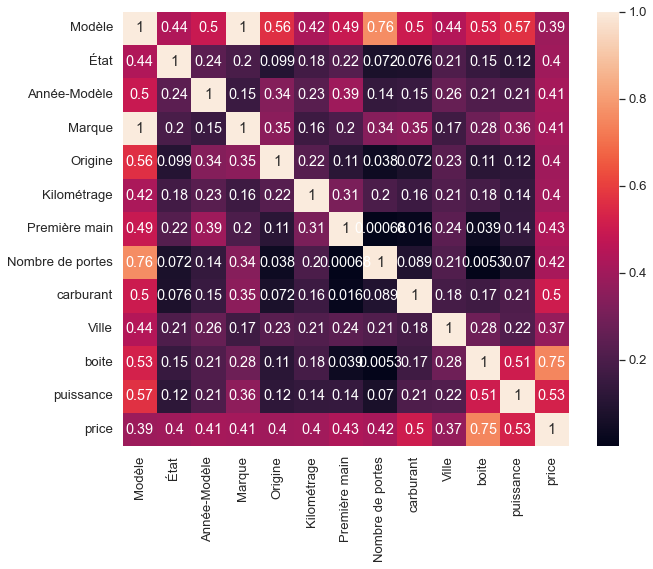

In [121]:
data=df1.copy()
corr_matrix(data)

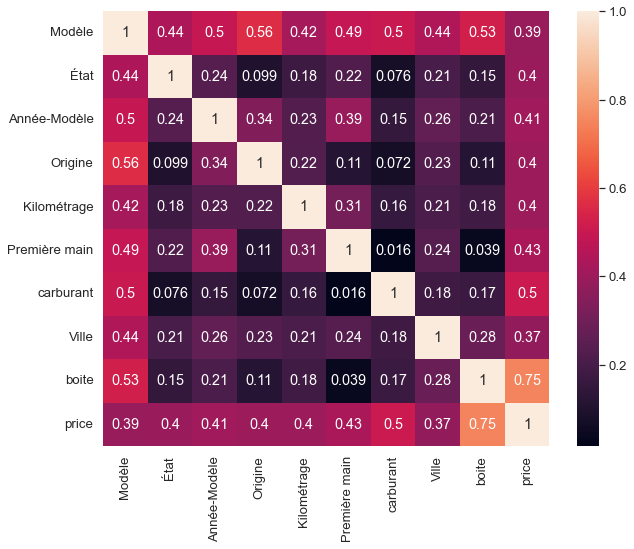

In [122]:
data = data.drop(['Marque','Nombre de portes','puissance'], axis=1)
corr_matrix(data)

,Modèle,État,Année-Modèle,Origine,Kilométrage,Première main,carburant,Ville,boite,price
0,Tiguan,NaN,2012.0,Dédouanée,194999.5,NaN,Diesel,Fquih Ben Saleh,NaN,210000.0
1,190,Très bon,2005.0,Dédouanée,274999.5,Non,NaN,Dakhla,Manuelle,55000.0
2,Lodgy,Très bon,2012.0,WW au Maroc,2499.5,Oui,Diesel,Ouled Teïma,NaN,87000.0
3,2,Excellent,2008.0,WW au Maroc,124999.5,Oui,NaN,El Jadida,Manuelle,54000.0
4,Kadjar,Excellent,2016.0,WW au Maroc,82499.5,Oui,NaN,Casablanca,Manuelle,159000.0


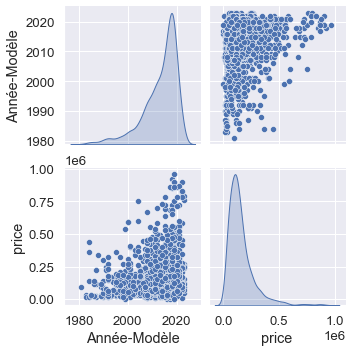

In [123]:
def visualize(data):
    sns.pairplot(data, diag_kind="kde", height=2.5)
visualize(data)
data.head()

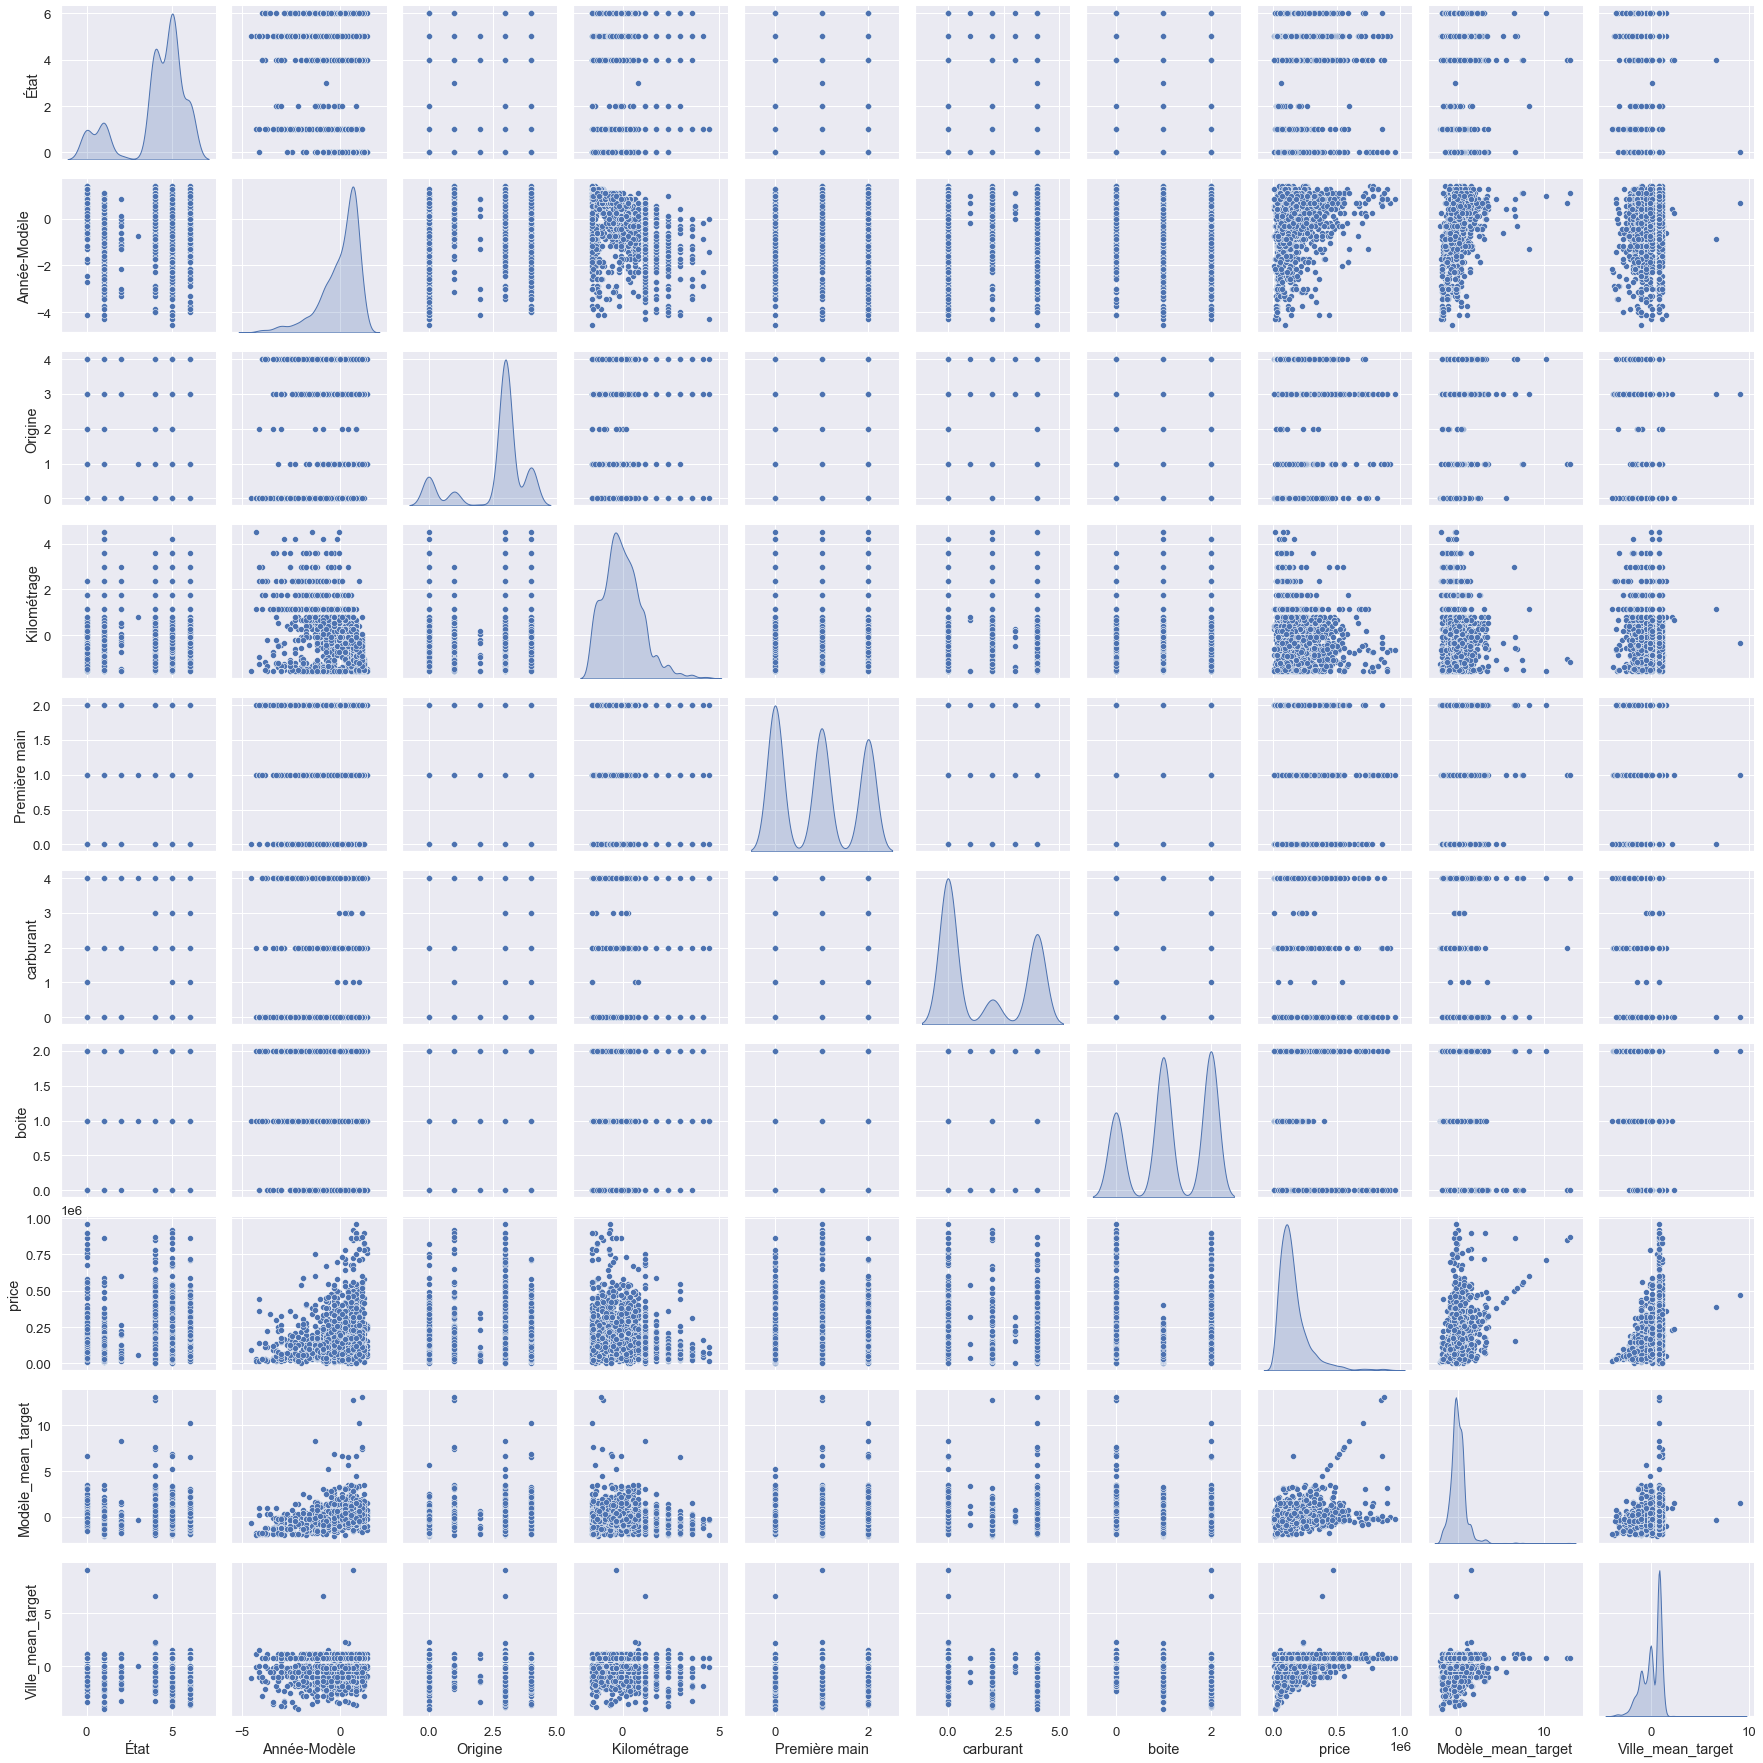

In [124]:
def preprocessing_one(data):
    data['Kilométrage'] = data['Kilométrage'].replace('Plus de 500 000', 500000.0)

# convert the column to float
    data['Kilométrage'] = data['Kilométrage'].astype(float)
    data['Année-Modèle'] = data['Année-Modèle'].astype(float)
    data['price'] = data['price'].astype(float)
    mean_target = data.groupby('Modèle')['price'].median()
    data['Modèle_mean_target'] = data['Modèle'].map(mean_target)
    mean_target = data.groupby('Ville')['price'].mean()
    data['Ville_mean_target'] = data['Ville'].map(mean_target)

    data['Année-Modèle'] = data['Année-Modèle'].fillna(data['Année-Modèle'].mean())  # fills missing values with the mean of the column
    data['Kilométrage'] = data['Kilométrage'].fillna(data['Kilométrage'].median())
    ignore_cols = ['Modèle', 'Ville']
    
# Define the scaler
    scaler = StandardScaler()

# Fit and transform the features
    data[['Année-Modèle','Kilométrage','Modèle_mean_target','Ville_mean_target']]=scaler.fit_transform(data[['Année-Modèle','Kilométrage','Modèle_mean_target','Ville_mean_target']])
    
    le = LabelEncoder()
    for i in [ 'Première main', 'boite','État',  'Origine','carburant']:
        data[i] = le.fit_transform(data[i])
# perform label encoding on 'team' column

# Split the dataset into features and target variable
    

# Concatenate the normalized features and the target variable
    normalized_data = data.drop( ignore_cols, axis=1)
    return normalized_data,data
def preprocessing_two(data):
    data['Kilométrage'] = data['Kilométrage'].replace('Plus de 500 000', 500000.0)

# convert the column to float
    data['Kilométrage'] = data['Kilométrage'].astype(float)
    data['Année-Modèle'] = data['Année-Modèle'].astype(float)
    data['Modèle_mean_target'] = 
normalized_data=preprocessing_one(data)[0]
data_new=preprocessing_one(data)[1]
visualize(normalized_data)

Text(0.5, 1.0, 'Clio Price Distribution')

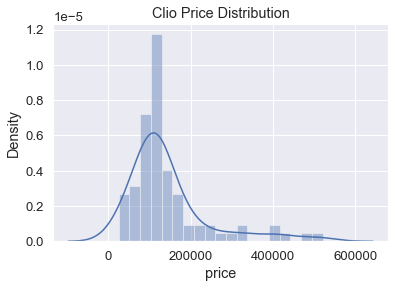

In [125]:
def remove_outliers(data, col,q_min,q_max):
    q01 = data[col].quantile(q_min)
    q99 = data[col].quantile(q_max)
    data = data[(data[col] > q01) & (data[col] < q99)]
    return data


# Exemple
data_no_out=remove_outliers(data, 'price',0.01,0.99)
clio1 = data_no_out.loc[data_no_out.Modèle=='Clio']
sns.distplot(clio1.price).set_title('Clio Price Distribution')


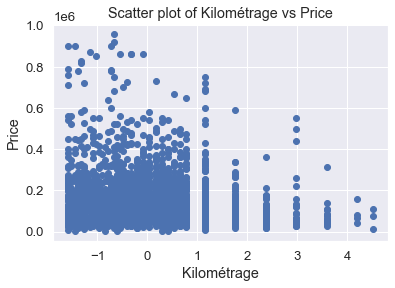

In [126]:
plt.scatter(data["Kilométrage"], data["price"])
plt.xlabel("Kilométrage")
plt.ylabel("Price")
plt.title("Scatter plot of Kilométrage vs Price")
plt.show()

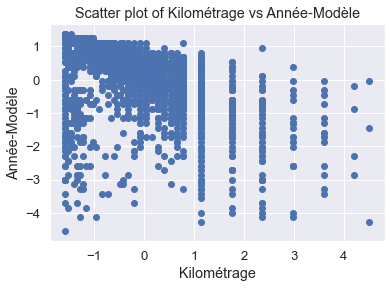

In [127]:
plt.scatter(data["Kilométrage"], data["Année-Modèle"])
plt.xlabel("Kilométrage")
plt.ylabel("Année-Modèle")
plt.title("Scatter plot of Kilométrage vs Année-Modèle")
plt.show()

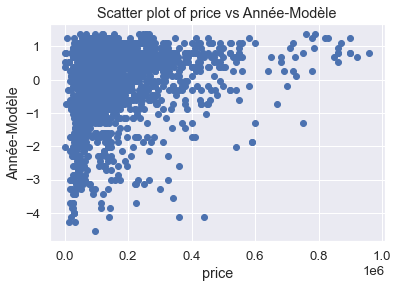

In [128]:
plt.scatter(data["price"], data["Année-Modèle"])
plt.xlabel("price")
plt.ylabel("Année-Modèle")
plt.title("Scatter plot of price vs Année-Modèle")
plt.show()

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
normalized_data.fillna(normalized_data.mean(), inplace=True)

# Load the data into a pandas dataframe
X = normalized_data.drop('price', axis=1)  # features
y = normalized_data['price']       
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Fit the model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = model.predict(X_test)

# Compute the R-squared score for the model
score = model.score(X_test, y_test)
score1 = model.score(X_train, y_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R-squared score:', score)
print('R-squared score:', score1)


Coefficients: [ -3007.81410733   9813.95434328  -4105.48303722  -7514.78011852
   6815.37283324  -7945.0438376  -31964.46312568  42550.12234193
  23815.80359584]
Intercept: 221615.40423492313
R-squared score: 0.18382747680019007
R-squared score: 0.2898206884570754


In [130]:
import statsmodels.api as sm
model1 = sm.OLS(y, X).fit()

# Print the summary of the model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.630
Model:                            OLS   Adj. R-squared (uncentered):              0.629
Method:                 Least Squares   F-statistic:                              474.6
Date:                Wed, 29 Mar 2023   Prob (F-statistic):                        0.00
Time:                        23:58:25   Log-Likelihood:                         -33046.
No. Observations:                2518   AIC:                                  6.611e+04
Df Residuals:                    2509   BIC:                                  6.616e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
État                1.628e+04   1223.012     13.310      0.000    1.39e+04    1.87e+04
Année-Modèle        -859.2146   2896.541     -0.297      0.767   -6539.071    4820.641
Origine              2.18e+04   1938.554     11.247      0.000     1.8e+04    2.56e+04
Kilométrage        -6679.7064   2706.433     -2.468      0.014    -1.2e+04   -1372.636
Première main       8015.2219   3113.036      2.575      0.010    1910.839    1.41e+04
carburant           3370.4664   1299.188      2.594      0.010     822.876    5918.057
boite               2559.5202   3033.967      0.844      0.399   -3389.815    8508.855
Modèle_mean_target  4.682e+04   2574.733     18.184      0.000    4.18e+04    5.19e+04
Ville_mean_target   2.627e+04   2472.247     10.627      0.000    2.14e+04    3.11e+04
==============================================================================
Omnibus:                     1274.542   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10781.453
Skew:                           2.238   Prob(JB):                         0.00
Kurtosis:                      12.095   Cond. No.                         8.09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
conf_int = model1.conf_int(alpha=0.1)

# print the confidence intervals
conf_int

,0,1
État,14265.954482,18290.793308
Année-Modèle,-5625.360348,3906.931121
Origine,18613.344298,24992.975317
Kilométrage,-11133.036476,-2226.376390
Première main,2892.841957,13137.601823
carburant,1232.703165,5508.229671
boite,-2432.754003,7551.794357
Modèle_mean_target,42583.407498,51056.654266
Ville_mean_target,22205.454522,30341.428872


MSE: 16833827005.437326
R2 score: 0.15294697327549267


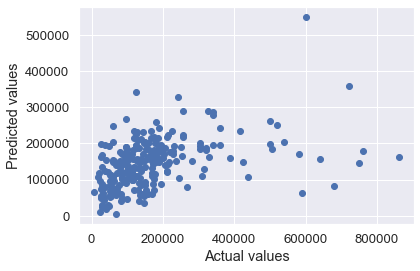

In [132]:
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,r2_score

def NNRegressor(data):
    X = pd.DataFrame(data.drop(['price'],axis=1))
    y = pd.DataFrame(data['price'])
    # print(X.head)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1)
    mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
    mlp.fit(X_train, y_train)
    
    y_pred = mlp.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE:", mse)
    print("R2 score:", r2)
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
NNRegressor(normalized_data)

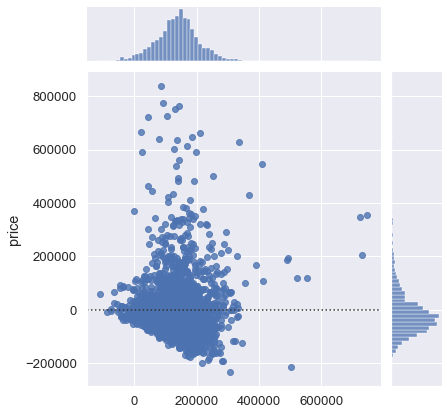

In [133]:
y_pred=model1.predict(X_train)
sns.jointplot(x=y_pred, y=y_train, kind='resid')


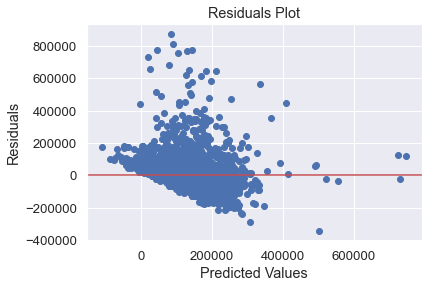

In [134]:
residuals = y_train - y_pred

# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuals Plot")
plt.show()

In [135]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

def evaluate_model(normalized_data):
    # Split the data into independent variables X and dependent variable y
    X = normalized_data.drop('price', axis=1)
    y = normalized_data['price']

    # Create an instance of the RandomForestRegressor class
    rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

    # Evaluate the performance of the model using cross-validation
    scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='r2')

    # Calculate the mean and standard deviation of the scores
    mean_score = scores.mean()
    std_score = scores.std()

    return mean_score, std_score
print(evaluate_model(normalized_data))

(0.2491675830647408, 0.07950156465529472)


In [136]:
import xgboost as xgb

def evaluate_model_xgb(normalized_data):
    # Split the data into independent variables X and dependent variable y
    X = normalized_data.drop('price', axis=1)
    y = normalized_data['price']

    # Create an instance of the XGBRegressor class
    xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)

    # Evaluate the performance of the model using cross-validation
    scores = cross_val_score(xgb_regressor, X, y, cv=5, scoring='r2')

    # Calculate the mean and standard deviation of the scores
    mean_score = scores.mean()
    std_score = scores.std()

    return mean_score, std_score
print(evaluate_model_xgb(normalized_data))

(0.0985374695860628, 0.08593670015216967)


In [137]:
import lightgbm as lgb

def evaluate_model_lgb(normalized_data):
    # Split the data into independent variables X and dependent variable y
    X = normalized_data.drop('price', axis=1)
    y = normalized_data['price']

    # Create an instance of the LGBMRegressor class
    lgb_regressor = lgb.LGBMRegressor(n_estimators=100, random_state=42)

    # Evaluate the performance of the model using cross-validation
    scores = cross_val_score(lgb_regressor, X, y, cv=5, scoring='r2')

    # Calculate the mean and standard deviation of the scores
    mean_score = scores.mean()
    std_score = scores.std()

    return mean_score, std_score
print(evaluate_model_lgb(normalized_data))

(0.22122359604478042, 0.0657423996784175)


In [138]:
import catboost as cb

def evaluate_model_cb(normalized_data):
    # Split the data into independent variables X and dependent variable y
    X = normalized_data.drop('price', axis=1)
    y = normalized_data['price']

    # Create an instance of the CatBoostRegressor class
    cb_regressor = cb.CatBoostRegressor(n_estimators=100, random_state=42, silent=True)

    # Evaluate the performance of the model using cross-validation
    scores = cross_val_score(cb_regressor, X, y, cv=5, scoring='r2')

    # Calculate the mean and standard deviation of the scores
    mean_score = scores.mean()
    std_score = scores.std()

    return mean_score, std_score
print(evaluate_model_cb(normalized_data))

(0.2549285975714192, 0.05715041984937696)


In [139]:
def fit_glm(data):
    # Split the data into independent variables X and dependent variable y
    X = data.drop('price', axis=1)
    y = data['price']

    # Add a constant term to the independent variables
    X = sm.add_constant(X)

    # Create an instance of the GLM class
    glm_model = sm.GLM(y, X, family=sm.families.Gaussian())

    # Fit the model to the data
    glm_results = glm_model.fit()

    return glm_results.summary()
fit_glm(normalized_data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                 2518
Model:                            GLM   Df Residuals:                     2508
Model Family:                Gaussian   Df Model:                            9
Link Function:               identity   Scale:                      1.1170e+10
Method:                          IRLS   Log-Likelihood:                -32697.
Date:                Thu, 30 Mar 2023   Deviance:                   2.8014e+13
Time:                        00:00:52   Pearson chi2:                 2.80e+13
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3099
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.157e+05   7620.895     28.305      0.000    2.01e+05    2.31e+05
État               -1542.9221   1237.133     -1.247      0.212   -3967.659     881.814
Année-Modèle        9011.4672   2546.142      3.539      0.000    4021.120     1.4e+04
Origine            -3766.7627   1914.518     -1.967      0.049   -7519.150     -14.376
Kilométrage        -7820.9234   2356.957     -3.318      0.001   -1.24e+04   -3201.372
Première main       5680.0139   2711.915      2.094      0.036     364.758     1.1e+04
carburant          -7378.8839   1193.305     -6.184      0.000   -9717.719   -5040.049
boite              -3.156e+04   2903.794    -10.868      0.000   -3.72e+04   -2.59e+04
Modèle_mean_target  4.103e+04   2251.256     18.224      0.000    3.66e+04    4.54e+04
Ville_mean_target    2.41e+04   2154.067     11.188      0.000    1.99e+04    2.83e+04
======================================================================================
"""

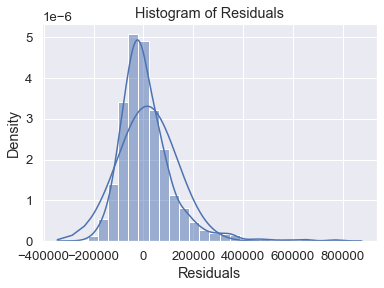

In [140]:
sns.histplot(data=residuals, kde=True, stat='density', bins=30)
sns.lineplot(x=sorted(residuals), y=norm.pdf(sorted(residuals), loc=residuals.mean(), scale=residuals.std()))

plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

In [141]:
from scipy.stats import skew, kurtosis
skewness = skew(residuals)
kurt = kurtosis(residuals)

print('Skewness: ', skewness)
print('Kurtosis: ', kurt)

Skewness:  2.2721379823513392
Kurtosis:  9.345612089827917


In [142]:
data_new.head()

,Modèle,État,Année-Modèle,Origine,Kilométrage,Première main,carburant,Ville,boite,price,Modèle_mean_target,Ville_mean_target
0,Tiguan,6,-0.174170,0,0.776607,2,0,Fquih Ben Saleh,2,210000.0,0.444020,0.085127
1,190,5,-1.164002,0,1.755394,0,4,Dakhla,1,55000.0,-1.171229,0.520697
2,Lodgy,5,-0.174170,3,-1.578601,1,0,Ouled Teïma,2,87000.0,1.775269,-2.658758
3,2,4,-0.739789,3,-0.079833,1,4,El Jadida,1,54000.0,-1.366479,-1.059850
4,Kadjar,4,0.391448,3,-0.599814,1,4,Casablanca,1,159000.0,0.426270,0.776946


In [143]:
data_new['Modèle_mean_target']= data_new['Modèle_mean_target'].fillna(data_new['Modèle_mean_target'].mean())

unique_column1 = data_new['Modèle'].unique()
unique_column2 = sorted(data_new['Modèle_mean_target'].unique())

# create a dictionary with unique_column1 values as keys and sorted unique_column2 values as values
dictionary = {key: value for key, value in zip(unique_column1, unique_column2)}

# print the resulting dictionary
# print the resulting dictionary
dictionary

{'Tiguan': -2.1119787540981005,
 '190': -2.00547882579903,
 'Lodgy': -1.9788538437242624,
 '2': -1.9699788496993398,
 'Kadjar': -1.8989788974999595,
 'Dokker': -1.8634789214002694,
 'Fiesta': -1.8457289333504243,
 'Duster': -1.836853939325502,
 'C-Elysée': -1.8279789453005792,
 'Cayenne': -1.7924789692008891,
 'Kuga': -1.756978993101199,
 'Logan': -1.739229005051354,
 'i 10': -1.7214790170015088,
 'A6': -1.7037290289516638,
 '220': -1.6859790409018187,
 'Berlingo': -1.6149790887024384,
 '208': -1.5794791126027483,
 'Focus': -1.5262291484532131,
 'Partner': -1.472979184303678,
 'Swift': -1.4552291962538328,
 'GOLF 7': -1.4374792082039878,
 'Clio': -1.4197292201541427,
 'Kangoo': -1.4019792321042976,
 '207': -1.3842292440544526,
 'a5_sportback': -1.3753542500295302,
 'sandero_stepway': -1.3664792560046075,
 'FREEMONT': -1.3487292679547624,
 'megane_4': -1.3309792799049174,
 'Korando': -1.2866043097803048,
 'Q7': -1.2688543217304598,
 'Megane 3': -1.224479351605847,
 'Actyon': -1.20672936

In [150]:
Budget=100000
df_zero = {'Modèle': ["Clio"], 'État': ["Bon"], 'Année-Modèle': [2019.0],'Origine': ["WW au Maroc"], 'Kilométrage':[130000.0],
        'Première main':["Non"], 'carburant':['Diesel'], 'Ville':['Casablanca'],'boite':['Manuelle'],'price':[10]}
df_one = pd.DataFrame(df_zero)
normalized_test=preprocessing_one(df_one)[0]
normalized_test.head()

,État,Année-Modèle,Origine,Kilométrage,Première main,carburant,boite,price,Modèle_mean_target,Ville_mean_target
0,0,0.0,0,0.0,0,0,0,10.0,0.0,0.0
